# Linear Regression with one variable

1️⃣ Problem setup

We want to learn the line:

𝑦 = 𝑚𝑥 + 𝑏

Where:

m → slope

b → intercept

We’ll learn m and b using Gradient Descent.

In [1]:
# Input (x) and Output (y)
x = [1, 2, 3, 4, 5]
y = [3, 5, 7, 9, 11]   # y = 2x + 1


In [2]:
m = 0    # slope seta 1
b = 0    # intercept seta 0


In [3]:
def predict(x, m, b):
    return m * x + b


# cost function
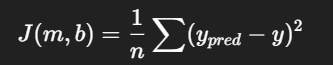

In [4]:
def cost_function(x, y, m, b):
    n = len(x)
    total_error = 0
    for i in range(n):
      total_error += (y[i] - (m * x[i] + b))**2
    return total_error / (2 * n)

# Gradient Descent


In [5]:
def gradient_descent(x, y, m, b, lr):
    n = len(x)
    dm = 0
    db = 0
    for i in range(n):
      y_pred = predict(x[i], m, b)
      dm += (y_pred - y[i]) * x[i]
      db += (y_pred - y[i])
    dm = dm / n
    db = db / n
    m = m - lr * dm
    b = b - lr * db
    return m, b


In [10]:
learning_rate = 0.01
epochs = 1500
for epoch in range(epochs):
    m, b = gradient_descent(x, y, m, b, learning_rate)

    if epoch % 100 == 0:
        cost = cost_function(x, y, m, b)
        print(f"Epoch {epoch}: m={m:.4f}, b={b:.4f}, cost={cost:.4f}")
print("Final model:")
print(f"y = {m:.2f}x + {b:.2f}")


Epoch 0: m=2.0017, b=0.9940, cost=0.0000
Epoch 100: m=2.0014, b=0.9949, cost=0.0000
Epoch 200: m=2.0012, b=0.9957, cost=0.0000
Epoch 300: m=2.0010, b=0.9964, cost=0.0000
Epoch 400: m=2.0008, b=0.9969, cost=0.0000
Epoch 500: m=2.0007, b=0.9974, cost=0.0000
Epoch 600: m=2.0006, b=0.9978, cost=0.0000
Epoch 700: m=2.0005, b=0.9982, cost=0.0000
Epoch 800: m=2.0004, b=0.9984, cost=0.0000
Epoch 900: m=2.0004, b=0.9987, cost=0.0000
Epoch 1000: m=2.0003, b=0.9989, cost=0.0000
Epoch 1100: m=2.0003, b=0.9991, cost=0.0000
Epoch 1200: m=2.0002, b=0.9992, cost=0.0000
Epoch 1300: m=2.0002, b=0.9993, cost=0.0000
Epoch 1400: m=2.0002, b=0.9994, cost=0.0000
Final model:
y = 2.00x + 1.00


In [11]:
x_new = 6
y_new = predict(x_new, m, b)
print("Prediction for x=6:", y_new)


Prediction for x=6: 13.000315432738361


----------

In [12]:
! pip install scikit-learn

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression


In [16]:
area = pd.read_csv("/content/homeprices.csv")
area

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [23]:
X = area[['area']]
y = area['price']

In [24]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [27]:
print("Slope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)

Slope (m): 135.78767123287673
Intercept (b): 180616.43835616432


In [28]:
model.predict([[5000]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

---

In [29]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [31]:
data = load_diabetes()
X = data.data
y = data.target
X_train , X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train_b = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_b = np.c_[np.ones((X_test.shape[0],1)),X_test]

In [34]:
def gradient_descent(X,y,lr=0.01,epochs=1000):
  m,n = X.shape
  theta = np.zeros(n)
  for _ in range(epochs):
    y_pred = X.dot(theta)
    error = y_pred -y
    gradients = (2/m) * X.T.dot(error)
    theta -= lr * gradients
  return theta

In [35]:
theta = gradient_descent(X_train_b,y_train,lr=0.1,epochs=2000)

In [36]:
theta

array([153.73654391,   1.75937573, -11.50964519,  25.62697203,
        16.82248343, -43.41745388,  23.83416789,   7.22196299,
        12.99713172,  34.76539953,   2.35883218])

In [37]:
y_train_pred = X_train_b.dot(theta)
y_test_pred = X_test_b.dot(theta)


In [38]:
train_mse =np.mean((y_train_pred-y_train)**2)
test_mse =np.mean((y_test_pred-y_test)**2)


In [39]:
print("Intercept (b):", theta[0])
print("Weights (w):", theta[1:])
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Intercept (b): 153.7365439093484
Weights (w): [  1.75937573 -11.50964519  25.62697203  16.82248343 -43.41745388
  23.83416789   7.22196299  12.99713172  34.76539953   2.35883218]
Train MSE: 2868.56908153065
Test MSE: 2899.352128062696


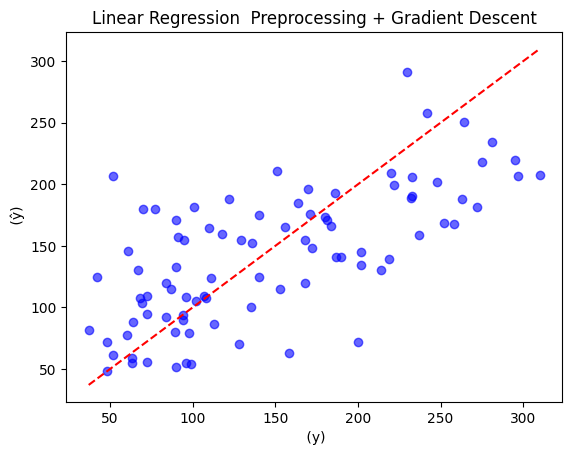

In [40]:
plt.scatter(y_test, y_test_pred, alpha=0.6, color="blue")
plt.xlabel(" (y)")
plt.ylabel(" (ŷ)")
plt.title("Linear Regression  Preprocessing + Gradient Descent")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linestyle="--")
plt.show()

Intercept (b): 153.73654390934846
Weights (w): [  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]
Train MSE: 2868.549702835577  RMSE: 53.558843367230935
Test MSE: 2900.1936284934823  RMSE: 53.853445836765935


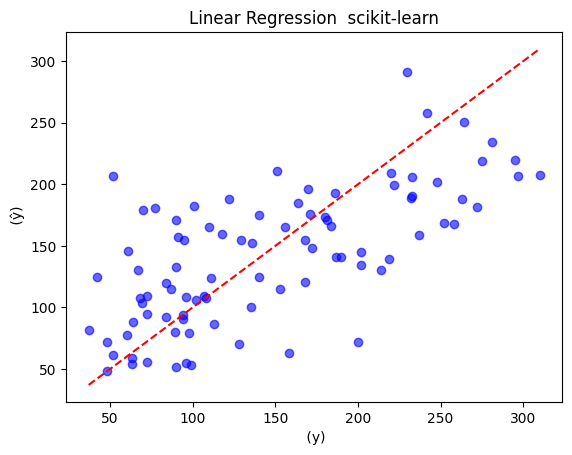

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


data = load_diabetes()
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("Intercept (b):", model.intercept_)
print("Weights (w):", model.coef_)
print("Train MSE:", train_mse, " RMSE:", train_rmse)
print("Test MSE:", test_mse, " RMSE:", test_rmse)


plt.scatter(y_test, y_test_pred, alpha=0.6, color="blue")
plt.xlabel(" (y)")
plt.ylabel(" (ŷ)")
plt.title("Linear Regression  scikit-learn")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linestyle="--")
plt.show()